In [2]:
import os
import h5py
import numpy as np
import pandas as pd
from tqdm import tqdm
import config as conf
from batchcreator import DataGenerator
import matplotlib.pyplot as plt
from plotter import plot_on_map
dg = DataGenerator([])

Pysteps configuration file found at: /usr/people/schreurs/.local/lib/python3.9/site-packages/pysteps/pystepsrc



In [2]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

In [3]:
def load_h5(fn):
    rdr = dg.load_h5(fn)
    
    #rdr = (rdr/12)#*12
    rdr = rdr[:,:,0]
    return rdr

In [5]:
radar_dir = conf.dir_rtcor 

files = getListOfFiles(radar_dir)
print(len(files))

1362895


In [6]:
# Threshold values in 0.01mm
# 0.3mm, 3mm, 30mm, 100mm (50dBZ) heavy rain/small hail, 200mm (~60dBZ) extreme hail
thresholds = [.3, 3, 30, 100, 200] 

In [13]:
np.random.seed(0)
random_files = np.random.choice(files, 8000)

In [14]:
count_exceed = np.zeros((len(thresholds), 765,700))
count_sum = 0
error_count=0
max_val = 0

for f in tqdm(files):
    try:
        rdr = load_h5(f)
    except Exception as e:
        print(e)
        error_count=+1
        rdr = np.zeros((765,700))        
    for i, thresh in enumerate(thresholds):
        count_exceed[i] += rdr>thresh
    if np.max(rdr) > max_val:
        max_val=np.max(rdr)
    count_sum += 1


100%|██████████| 8000/8000 [01:51<00:00, 71.71it/s]


In [7]:
files[0]

'/nobackup_1/users/schreurs/project_GAN/dataset_rtcor2/2008/03/RAD_NL25_RAC_5M_200803211900.h5'

In [10]:
from radarplot import plot_on_map

In [4]:
prob = np.load('prob_exceed.npy')
prob.shape

(5, 765, 700)

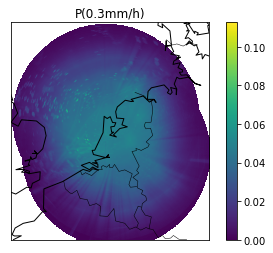

In [85]:
plot_on_map(prob[0]/100, ftype='.h5')
plt.title('P(0.3mm/h)')
plt.savefig('figures/prob_exceed_03mmh_rtcor_clutter', bbox_inches='tight')

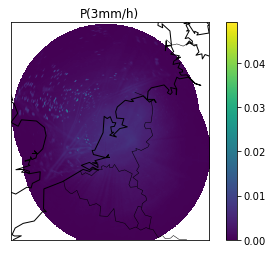

In [11]:
plot_on_map(prob[1]/100, ftype='.h5')
plt.title('P(3mm/h)')
plt.savefig('figures/prob_exceed_3mmh_rtcor_clutter', bbox_inches='tight')

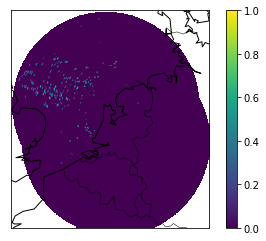

In [72]:
plot_on_map(prob[1]>1, ftype='.h5')

In [45]:
mask_03mm = prob[0]>6
mask_3mm = prob[1]>1
mask_30mm = prob[2]>0.05
mask_100mm = prob[3]>0.01

In [46]:
masks = [mask_03mm, mask_3mm, mask_30mm, mask_100mm]

................................................................


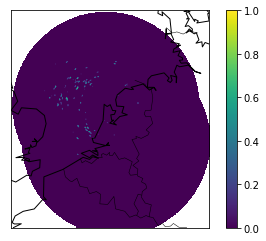

................................................................


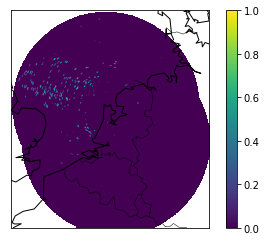

................................................................


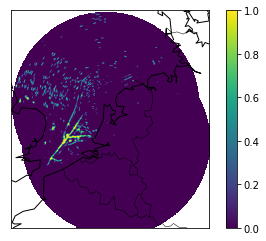

................................................................


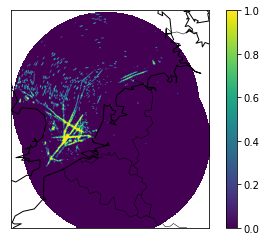

In [64]:
mask = np.zeros((765,700))

for m in masks:
    print('.'*64)
    mask = mask + m
    plot_on_map(mask>0, ftype='.h5')
    plt.show()

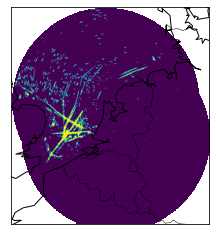

In [58]:
plot_on_map(mask, ftype='.h5', colorbar=None)

In [68]:
100*np.sum(mask)/nr_unmasked_pixels

4.435608283823253

In [69]:
nr_unmasked_pixels

431057

In [71]:
0.01*431057

4310.57

In [70]:
30/431057

6.95963642859297e-05

In [65]:
path = conf.dir_rtcor +  '2019/01/{}201901010000.h5'.format(conf.prefix_rtcor)
with h5py.File(path, 'r') as f:
    rain = f['image1']['image_data'][:]
    mask2 = (rain == 65535)
nr_unmasked_pixels = (765*700)-np.sum(mask2)    

In [57]:
mask = mask>0

Text(0.5, 1.0, 'P(30mm/h)')

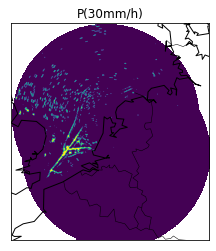

In [55]:
i = 2
plot_on_map(prob[i]>0.05, ftype='.h5', colorbar=None)
plt.title('P({}mm/h)'.format(thresholds[i]))

Text(0.5, 1.0, 'P(100mm/h)')

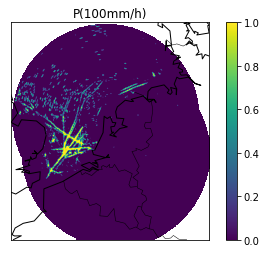

In [16]:
i = 3
plot_on_map(prob[i]>0.01, ftype='.h5')
plt.title('P({}mm/h)'.format(thresholds[i]))

Text(0.5, 1.0, 'P(100mm/h)')

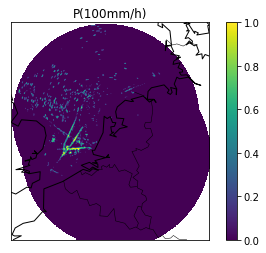

In [69]:
i = 4
plot_on_map(prob[i]>0.01, ftype='.h5')
plt.title('P({}mm/h)'.format(thresholds[i]))

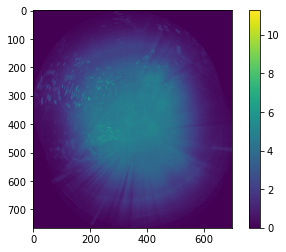

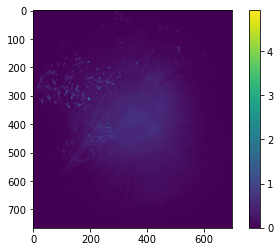

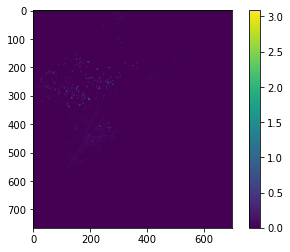

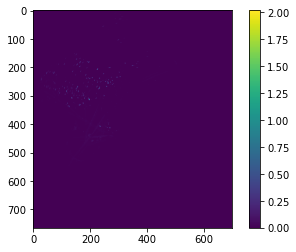

In [29]:
prob = np.load('prob_exceed.npy')
plt.imshow(prob[0])
plt.colorbar()
plt.show()
plt.imshow(prob[1])
plt.colorbar()
plt.show()
plt.imshow(prob[2])
plt.colorbar()
plt.show()
plt.imshow(prob[3])
plt.colorbar()
plt.show()

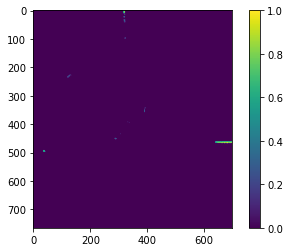

In [159]:
p = 100*count_exceed[0]/count_sum
plt.imshow(p>15)
plt.colorbar()

In [22]:
prob_exceed = np.load('prob_exceed.npy')

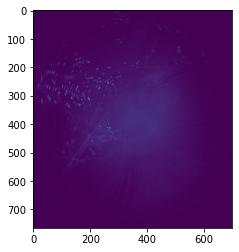

In [28]:
plt.imshow(prob_exceed[1])

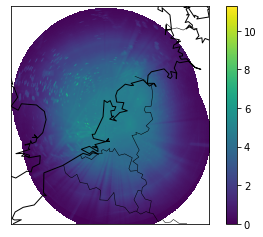

In [39]:
from radarplot import plot_on_map
plot_on_map(prob_exceed[0], ftype='.h5', res='l',colorbar=True, vmax=None, axis=None)

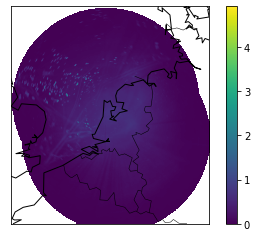

In [88]:
plot_on_map(prob_exceed[1], ftype='.h5', res='l',colorbar=True, vmax=None, axis=None)

Create a mask that masks pixels with high probability of containing clutter

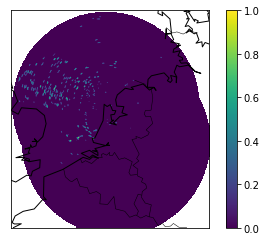

In [118]:
plot_on_map(prob_exceed[1]>.8, ftype='.h5', res='l',colorbar=True, vmax=None, axis=None)

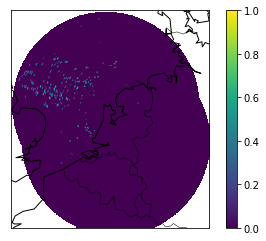

In [120]:
plot_on_map(prob_exceed[1]>1, ftype='.h5', res='l',colorbar=True, vmax=None, axis=None)

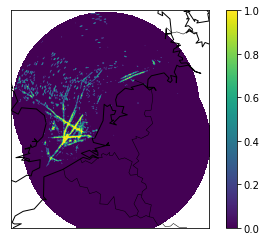

In [130]:
plot_on_map(prob_exceed[4]>0.005, ftype='.h5', res='l',colorbar=True, vmax=None, axis=None)

Now look at the dataset that was labeled as rainy

In [12]:
# Load all target files in the training set
fn_rtcor_train = np.load('datasets/train2008_2018_3y_30m.npy', allow_pickle = True)[:,0]
fn_rtcor_val = np.load('datasets/val2019_3y_30m.npy', allow_pickle = True)[:,0]

filenames_rtcor= np.append(fn_rtcor_train, fn_rtcor_val)
# flatten the array
filenames_rtcor = [item for sublist in filenames_rtcor for item in sublist]
len(filenames_rtcor)

442050

In [13]:
# Load all target files in the training set
fn_rtcor_train = np.load('datasets/train2008_2018_3y_30m.npy', allow_pickle = True)[:,1]
fn_rtcor_val = np.load('datasets/val2019_3y_30m.npy', allow_pickle = True)[:,1]

filenames_rtcor_y= np.append(fn_rtcor_train, fn_rtcor_val)
# flatten the array
filenames_rtcor_y = [item for sublist in filenames_rtcor_y for item in sublist]
print(len(filenames_rtcor_y))
# remove duplicate filenames:
filenames_rtcor_y = list(set(filenames_rtcor_y))
print(len(filenames_rtcor_y))

221025
80710


In [14]:
filenames_rtcor_all = np.append(filenames_rtcor, filenames_rtcor_y)
print(len(filenames_rtcor_all))
# remove duplicate filenames:
filenames_rtcor_all = list(set(filenames_rtcor_all))
print(len(filenames_rtcor_all))

522760
451957


In [11]:
def load_h5_from_timestamp(ts):
    filename = ts + '.h5'
        
    year = ts[0:4]
    month = ts[4:6] 
    path_scan = conf.dir_rtcor + str(year) + '/' + month + '/' + conf.prefix_rtcor + filename 
    
    radar_img = load_h5(path_scan)     
    return radar_img

In [17]:
count_exceed = np.zeros((len(thresholds), 765,700))
count_sum = 0
error_count=0

for f in tqdm(filenames_rtcor_all):
    try:
        rdr = load_h5_from_timestamp(f)
        for i, thresh in enumerate(thresholds):
            count_exceed[i] += rdr>thresh
        count_sum += 1
    except Exception as e:
        print(e)
        error_count=+1        

100%|██████████| 451957/451957 [4:02:47<00:00, 31.03it/s]    


In [18]:
count_sum

451957

In [20]:
np.save('count_exceed_thresh_rainy_noclutter_samples_2008_2019', count_exceed)

In [21]:
prob = count_exceed/count_sum

In [27]:
np.save('prob_exceed_thresh_rainy_noclutter_samples_2008_2019', prob)

In [28]:
prob_clutter = np.load('prob_exceed.npy')

Text(0.5, 1.0, 'P(0.3mm/h)')

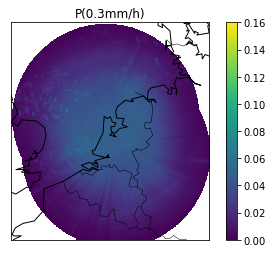

In [36]:
plot_on_map(prob_clutter[0]/100, ftype='.h5', vmax= 0.16)
plt.title('P(0.3mm/h)')

Text(0.5, 1.0, 'P(0.3mm/h)')

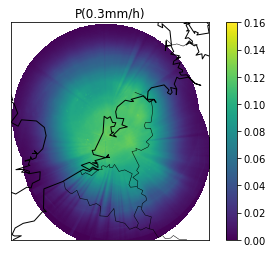

In [39]:
plot_on_map(prob[0], ftype='.h5', vmax = .16)
plt.title('P(0.3mm/h)')


In [1]:
plot_on_map(prob[0], ftype='.h5', vmax=.16)
plt.title('P(0.3mm/h)')
plt.savefig('figures/prob_exceed_03mmh_rtcor_noclutter', bbox_inches='tight')

NameError: name 'plot_on_map' is not defined

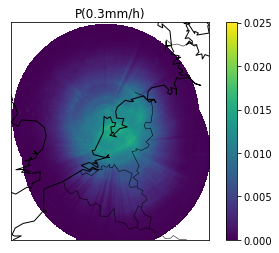

In [26]:
plot_on_map(prob[1], ftype='.h5')
plt.title('P(0.3mm/h)')
plt.savefig('figures/prob_exceed_3mmh_rtcor_noclutter', bbox_inches='tight')

In [15]:
count_exceed = np.zeros((len(thresholds), 765,700))
count_sum = 0
error_count=0
max_val = 0

np.random.seed(0)
random_files = np.random.choice(filenames_rtcor_all, 800)

for f in tqdm(random_files):
    try:
        rdr = load_h5_from_timestamp(f)
        for i, thresh in enumerate(thresholds):
            count_exceed[i] += rdr>thresh
        count_sum += 1
    except Exception as e:
        print(e)
        error_count=+1        



100%|██████████| 800/800 [00:39<00:00, 20.46it/s]


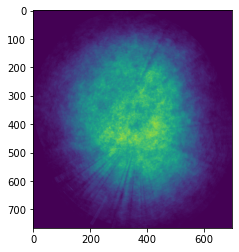

In [16]:
plt.imshow(count_exceed[0])

In [9]:
import netCDF4
def get_mask_y():
    '''
    The Overeem images are masked. Only values near the netherlands are kept.
    The model output should also be masked, such that the output of the masked values becomes zero.
    This function returns the approriate mask to mask the output
    '''
    # Get the mask for the input data
    y_path = conf.dir_aart
    # The mask is the same for all radar scans, so simply chose a random one to get the mask
    path = y_path + '2019/' + conf.prefix_aart + '201901010000.nc'

    with netCDF4.Dataset(path, 'r') as f:
        rain = f['image1_image_data'][:].data[0]
        mask = (rain != 65535)
    mask = mask.astype(float)
    return mask

In [10]:
def load_nc(fn):
    rdr = dg.load_nc(fn)
    
    rdr = (rdr/100)*12
    rdr = rdr[:,:,0]
    return rdr

In [11]:
def load_nc_from_timestamp(ts):
    filename = ts + '.nc'
        
    year = ts[0:4]
    month = ts[4:6] 
    path_scan = conf.dir_aart + str(year) + '/'  + '/' + conf.prefix_aart + filename 
    
    radar_img = load_nc(path_scan)     
    return radar_img

In [53]:
filenames_rtcor[0]

'201901130435'

In [64]:
files2019[0]

'201903040515'

In [65]:
radar_dir = conf.dir_rtcor + '2019'
files = getListOfFiles(radar_dir)
print(len(files))

104747


In [66]:
files2019 = [fn[-15:-3] for fn in files]

In [84]:
count_exceed = np.zeros((len(thresholds), 765,700))
count_sum = 0
error_count=0
max_val = 0

np.random.seed(0)
random_files = np.random.choice(files2019, 1000)

mask = get_mask_y()
nr_ab = np.arange(0,250,1)
errors = np.zeros(len(nr_ab))
counts = np.zeros(len(nr_ab))
for f in tqdm(files2019):
        rdr = load_h5_from_timestamp(f)
        
        aart = load_nc_from_timestamp(f)
        
        # compute gradient of image
        gx, gy = np.gradient(rdr)
            
        grad = np.hypot(gx,gy)
        
        abnormal_pixels = np.sum(grad>60)
        
        
        rtcor_nl = rdr * mask
        aart = load_nc_from_timestamp(f)
        error = np.sum(np.abs(rtcor_nl - aart))
        
        count = np.sum(mask)
        

        for i, nr in enumerate(nr_ab):
            if abnormal_pixels>nr:
                errors[i] +=error
                counts[i] +=count
mae = [error/count for error, count in zip(errors,counts)]       

<ipython-input-9-02d5dc00d0e1>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rain = f['image1_image_data'][:].data[0]
100%|██████████| 104747/104747 [1:25:35<00:00, 20.40it/s]


(0.0, 150.0)

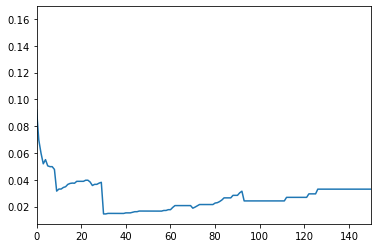

In [83]:
plt.plot(nr_ab, mae)
plt.xlim(0,150)

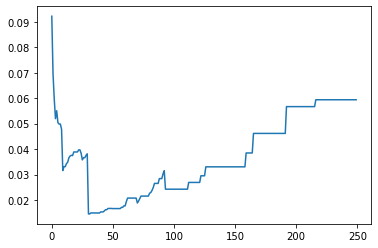

In [69]:
plt.plot(nr_ab, mae)

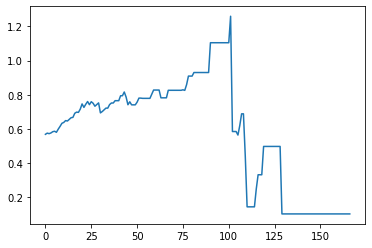

In [46]:
plt.plot(nr_ab, mae)

In [257]:
mae

[34.6332762566488,
 34.73320600142891,
 34.7962081109712,
 35.00336809729052,
 35.065903572667374,
 35.11617153277195,
 35.15646477234962,
 35.284742781323054,
 35.39440028954035,
 35.47532703310832,
 35.51822090501041,
 35.67674531614648,
 35.82148259168381,
 35.9390641833043,
 35.995582207282915,
 36.16813378408835,
 36.409951948258986,
 36.788362190159084,
 36.81498354424512,
 36.95058450046686,
 37.06730827493453]